In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Read The file and Show description 

In [ ]:
data = pd.read_csv("Heart Prediction Quantum Dataset.csv")
print(data.head())
6
print(data.info())

print(data.isnull().sum())
print(data.duplicated().sum())



   Age  Gender  BloodPressure  Cholesterol  HeartRate  QuantumPatternFeature  \
0   68       1            105          191        107               8.362241   
1   58       0             97          249         89               9.249002   
2   44       0             93          190         82               7.942542   
3   72       1             93          183        101               6.495155   
4   37       0            145          166        103               7.653900   

   HeartDisease  
0             1  
1             0  
2             1  
3             1  
4             1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int

Select the Numeric featuers and visualize Distribution of Coulmns

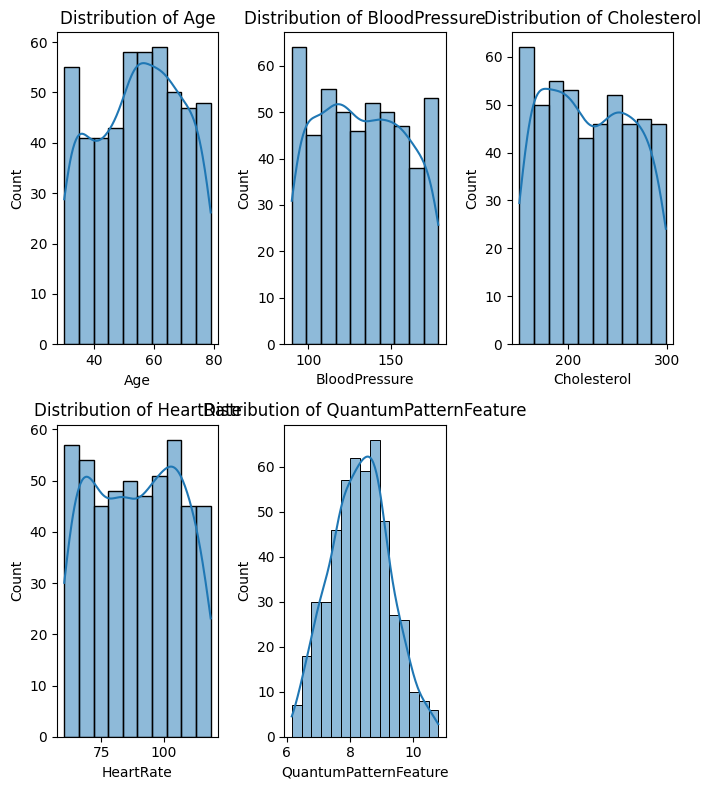

In [3]:


num_f = ['Age', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature']

plt.figure(figsize=(7, 8))
for i, feature in enumerate(num_f):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

Scalling the values 

In [4]:


scaler = StandardScaler()
data[num_f] = scaler.fit_transform(data[num_f])



the correlation of every 2 coulmns


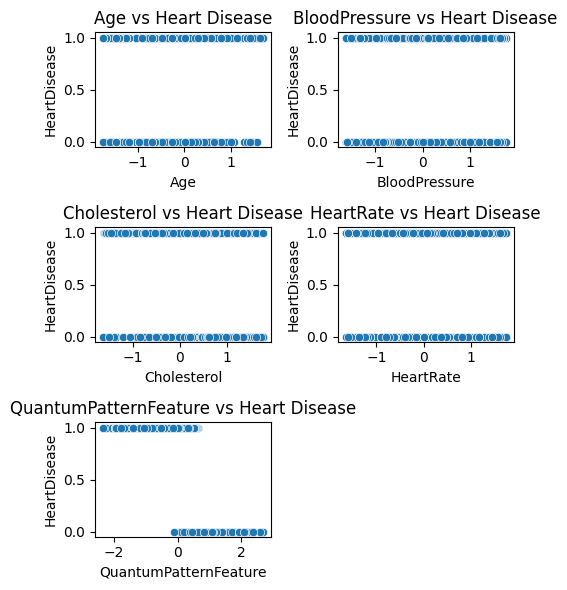

In [5]:

plt.figure(figsize=(5, 6))
for i, feature in enumerate(num_f):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=data[feature], y=data['HeartDisease'].astype(int))
    plt.title(f'{feature} vs Heart Disease')
plt.tight_layout()
plt.show()


Heatmap

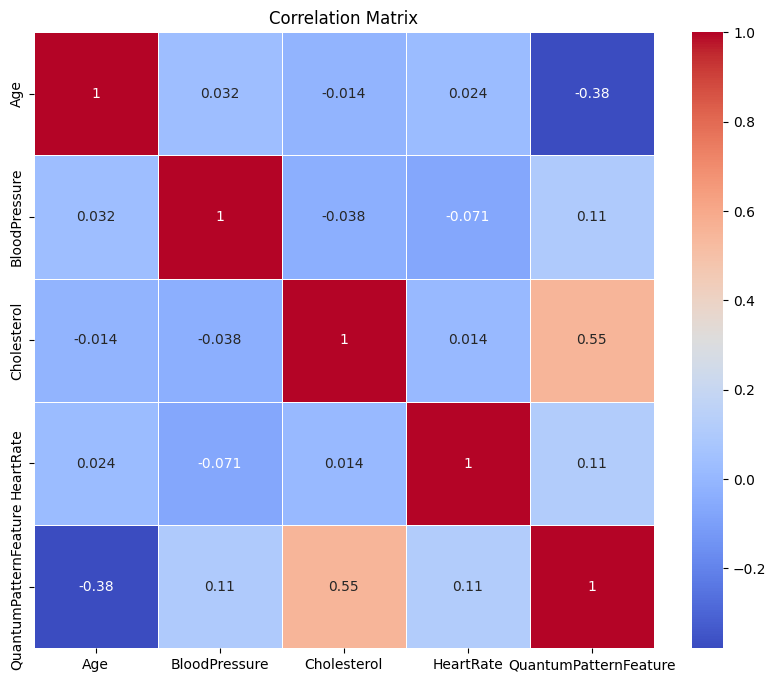

In [6]:
c_mat = data[num_f].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(c_mat , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Training the Logistic Reg 

In [7]:
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=47)

model = LogisticRegression(random_state=123)
model.fit(X_train, y_train)

predictions = model.predict(X_test)


Print the Accuracy

In [8]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("\nAccuracy Score:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[ 79   6]
 [ 10 105]]

Accuracy Score: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        85
           1       0.95      0.91      0.93       115

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



Show A random test case to Evaluate the training

In [9]:

import random

r_1 = random.randint(0, len(X_test) - 1)
sample = X_test.iloc[r_1:r_1+1]
actual = y_test.iloc[r_1]

predicted_class = model.predict(sample)[0]
predicted_prob = model.predict_proba(sample)[0]
print("Sample ", sample)
print("\nActual Label (Heart Disease):", actual)
print("Predicted Class:", predicted_class)
print("Prediction Probabilities [No, Yes]:", predicted_prob)

Sample           Age  Gender  BloodPressure  Cholesterol  HeartRate  \
386  0.42907       0      -0.525688    -0.718854   0.185864   

     QuantumPatternFeature  
386              -0.956069  

Actual Label (Heart Disease): 1
Predicted Class: 1
Prediction Probabilities [No, Yes]: [0.00231708 0.99768292]
